# Breast Cancer Diagnosis

### Abstract: 
This notebook attempts to predict cancer by applying some basic Machine Learning algorithms on the Breast Cancer (Wisconsin) Diagnosis dataset. Existing algorithms in the python programming language scikit-learn package are used to classify cases as Benign (B) or Malignant (M).

### Introduction:
The Breast Cancer (Wisconsin) Diagnosis dataset contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a of a fine needle aspirate (FNA) of a breast mass.

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter);
* texture (standard deviation of gray-scale values);
* perimeter;
* area;
* smoothness (local variation in radius lengths);
* compactness (perimeter^2 / area - 1.0);
* concavity (severity of concave portions of the contour);
* concave points (number of concave portions of the contour);
* symmetry;
* fractal dimension (“coastline approximation” - 1).

The mean, standard error (SE) and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. We will analyze the features to understand the predictive value for diagnosis. We will then create models using two different algorithms and use the models to predict the diagnosis.

Fine-needle aspiration (FNA) is a diagnostic procedure used to investigate lumps or masses. In this technique, a thin (23–25 gauge), hollow needle is inserted into the mass for sampling of cells that, after being stained, will be examined under a microscope (biopsy). Fine-needle aspiration biopsies are very safe minor surgical procedures.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline  

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

<font size="5">What does the data look like?</font>

In [29]:
data = pd.read_csv("data.csv")
filtered_data = data.dropna(axis='columns', how='all').copy()
filtered_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
filtered_data['diagnosis'] = pd.Categorical(filtered_data['diagnosis'])
print('Categories:\n', filtered_data['diagnosis'].value_counts())

Categories:
 B    357
M    212
Name: diagnosis, dtype: int64


In [31]:
filtered_data['diagnosis'] = filtered_data.diagnosis.cat.codes

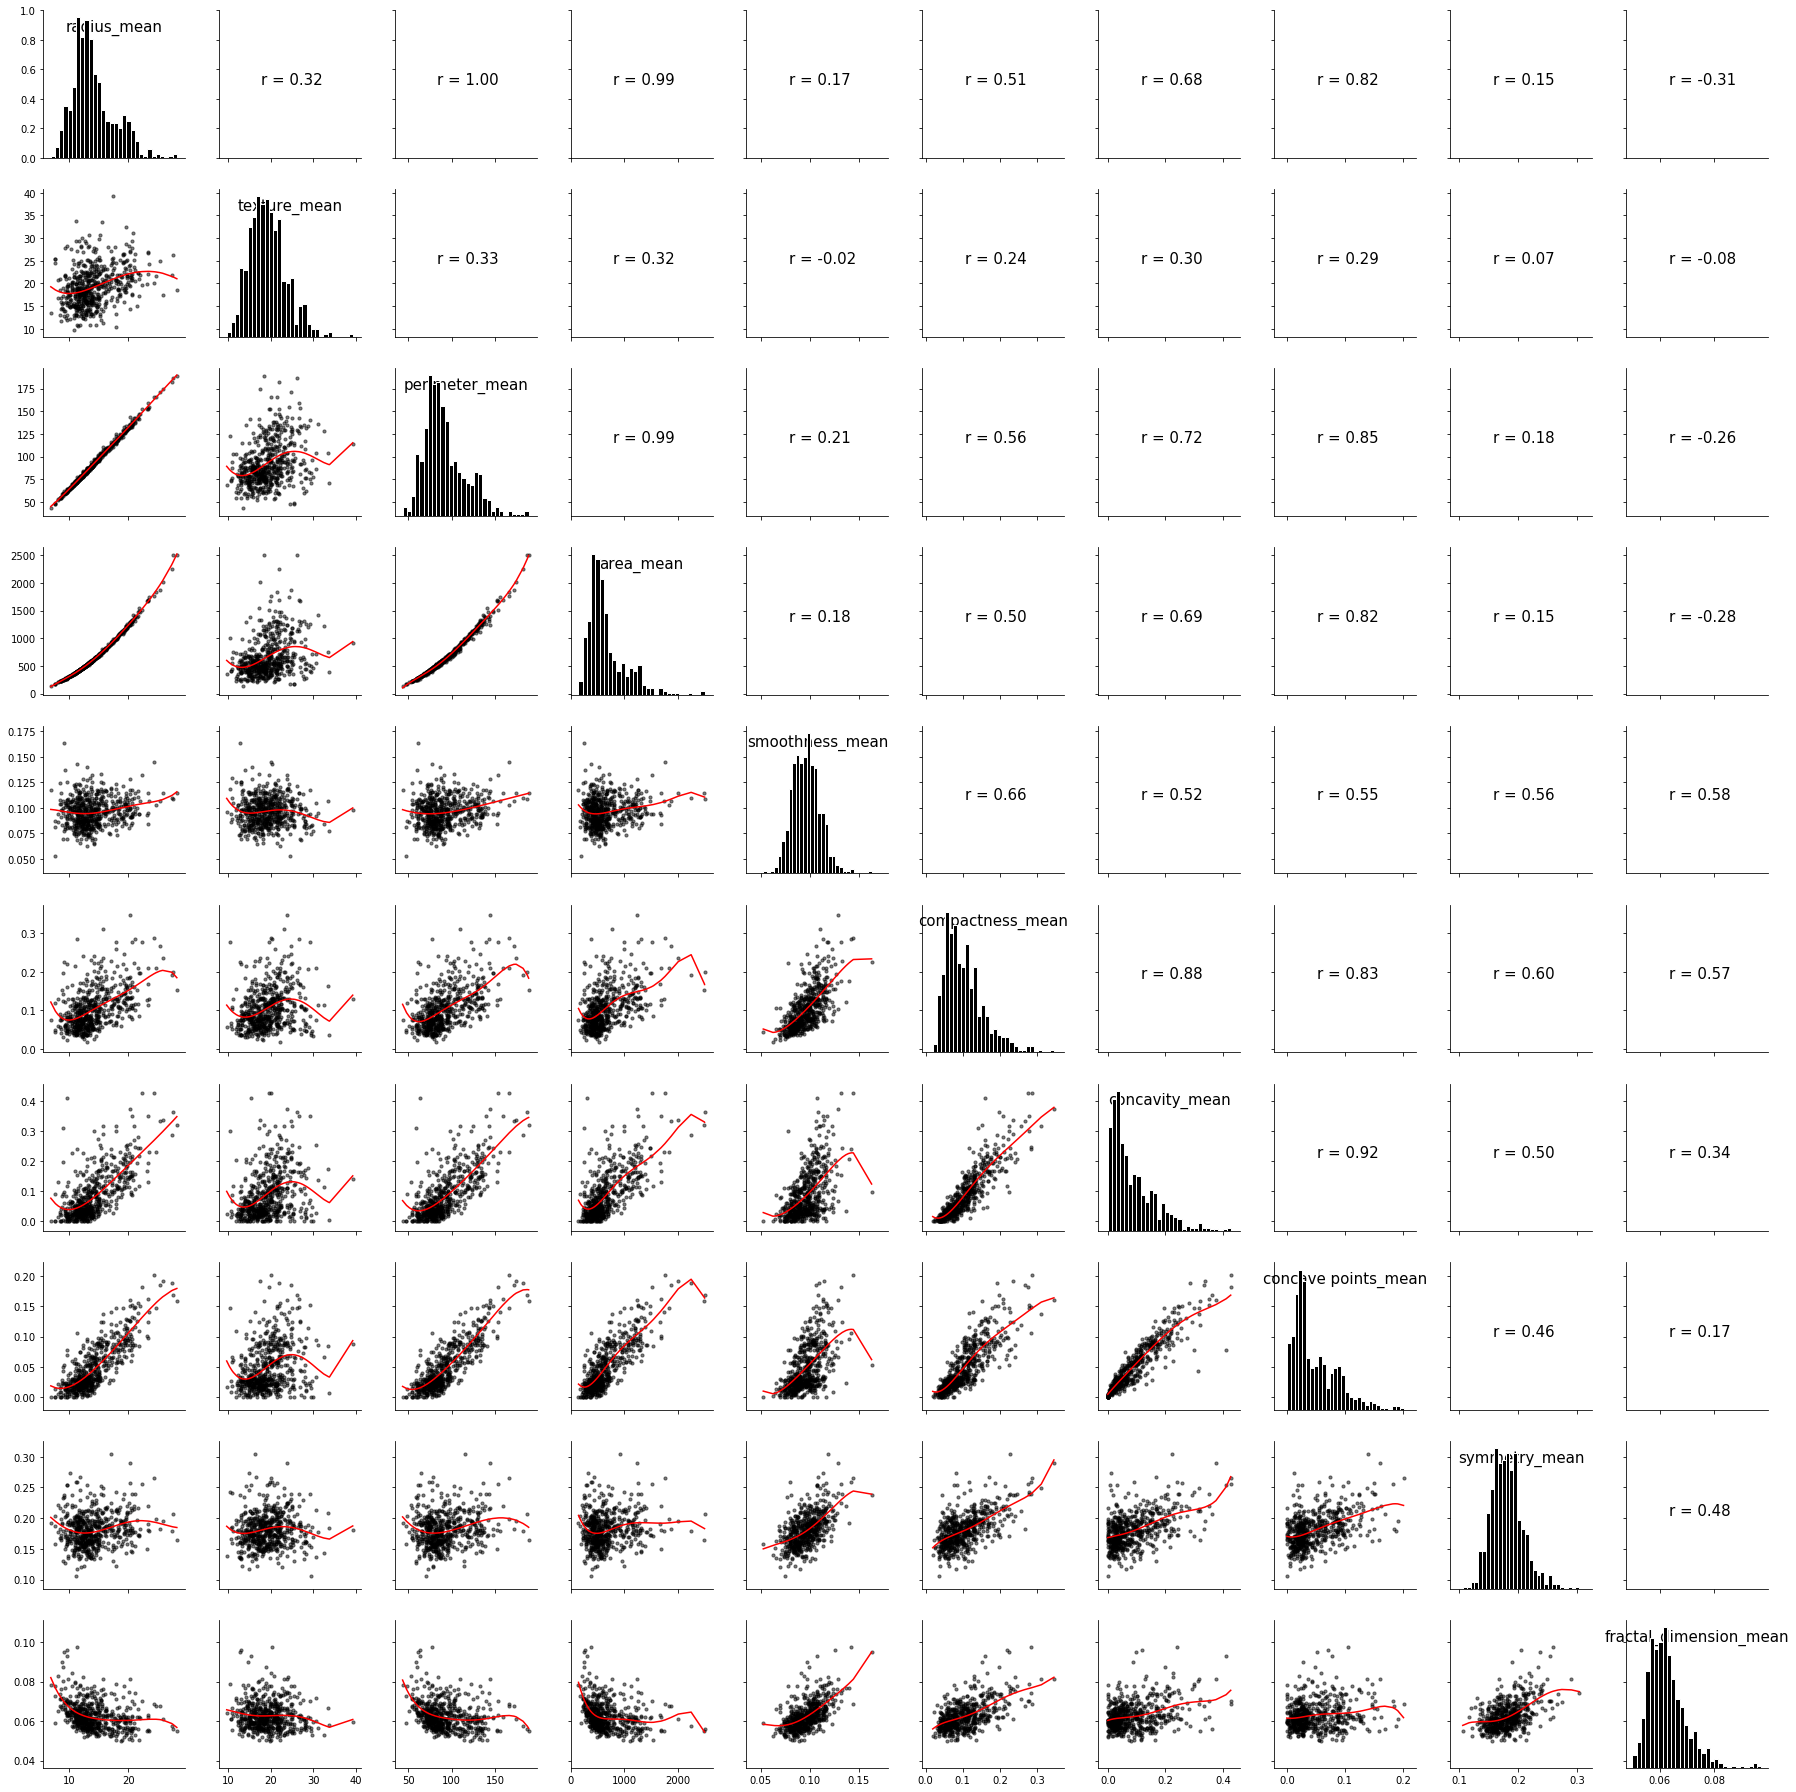

In [32]:
def corrplot(df):
    def scatterfunc(x, y, **kws):
        plt.scatter(x, y, linewidths=1, facecolor="k", s=10, alpha = 0.5)
        spline = np.polyfit(x, y, 5)
        model = np.poly1d(spline)
        x = np.sort(x)
        plt.plot(x,model(x),'r-')
        
    def histfunc(x, **kws):
        plt.hist(x,bins=30,color = "black", ec="white")

    def corrfunc(x, y, **kws):
        r, _ = stats.pearsonr(x, y)
        ax = plt.gca()
        ax.annotate("r = {:.2f}".format(r),
                    xy=(.3, .5), xycoords=ax.transAxes, fontsize=15)
    
    def make_diag_titles(g,titles):
        for ax in g.axes.flatten():
            ax.set_ylabel('')
            ax.set_xlabel('')
        for ax, col in zip(np.diag(g.axes), df.columns):
            ax.set_title(col, y=0.82, fontsize=15)
        return g

    g = sns.PairGrid(df, diag_sharey=False)
    g.map_lower(scatterfunc) 
    g.map_upper(corrfunc) 
    g.map_diag(histfunc)
    g = make_diag_titles(g, df.columns)
    plt.tight_layout()

corrplot(filtered_data.loc[:,'radius_mean':'fractal_dimension_mean'])
#corrplot(filtered_data.loc[:,'radius_se':'fractal_dimension_se'])
#corrplot(filtered_data.loc[:,'radius_worst':'fractal_dimension_worst'])

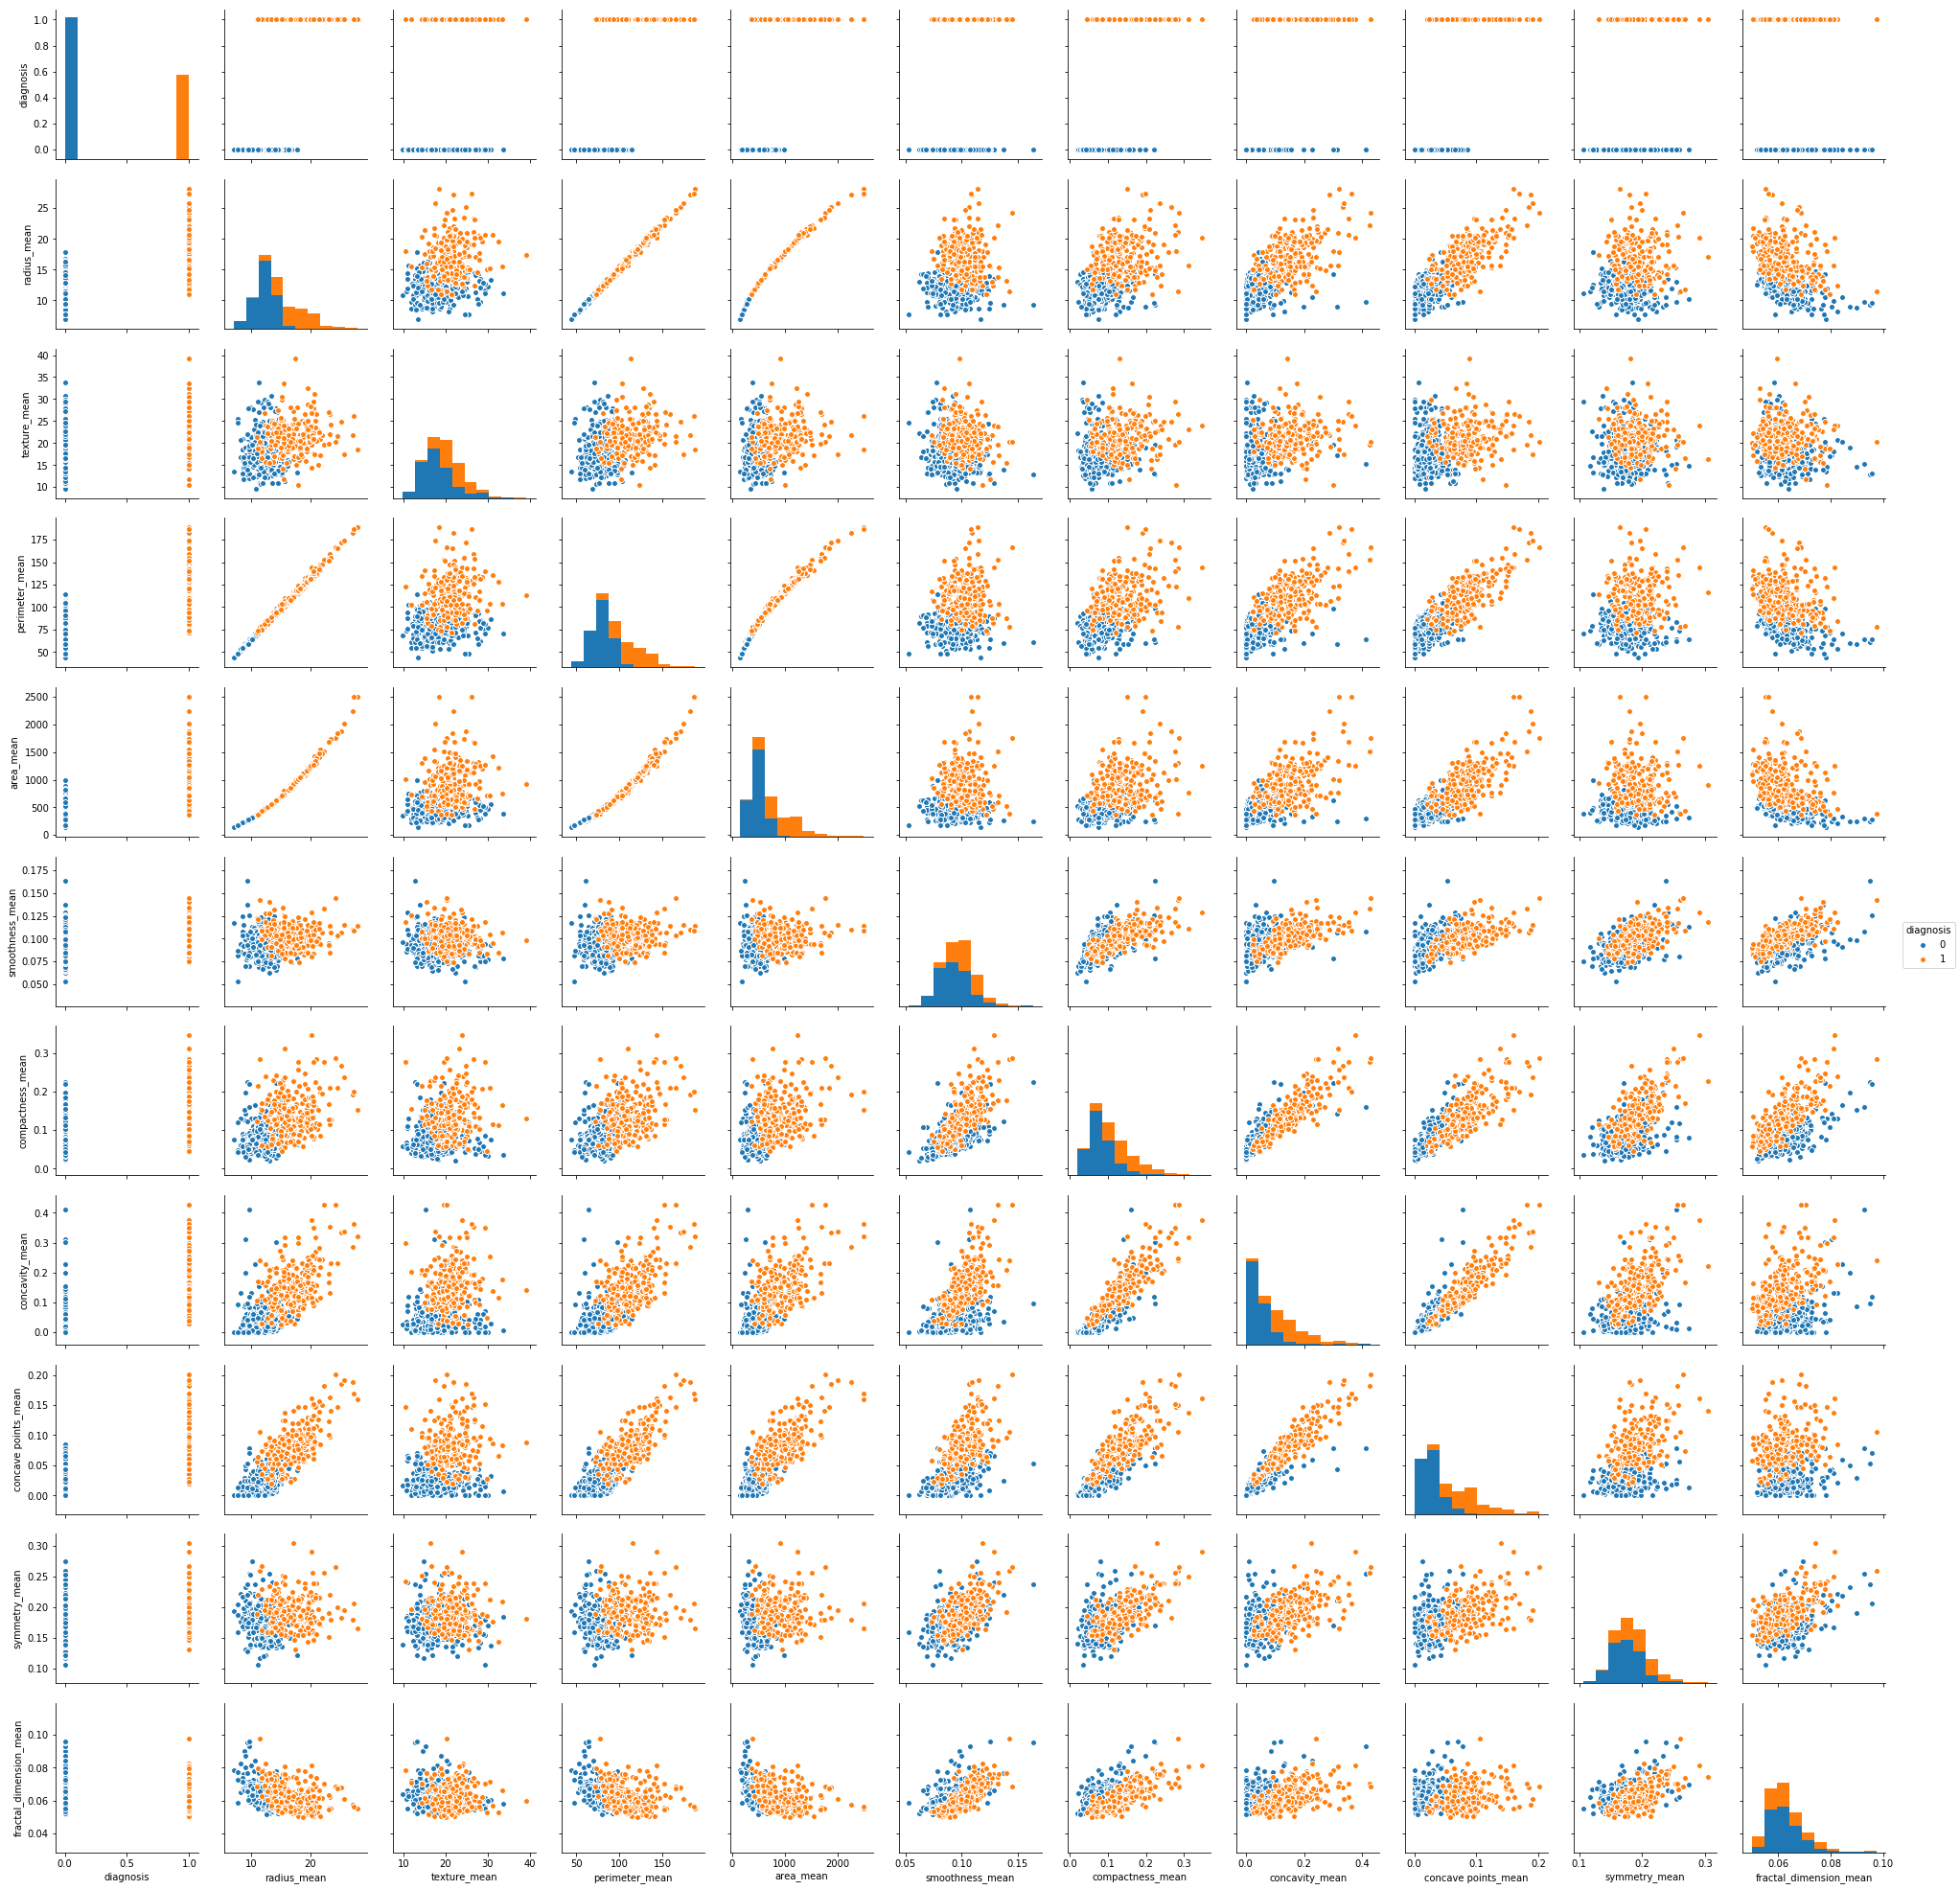

In [33]:
sns.pairplot(filtered_data.loc[:,'diagnosis':'fractal_dimension_mean'], hue="diagnosis")

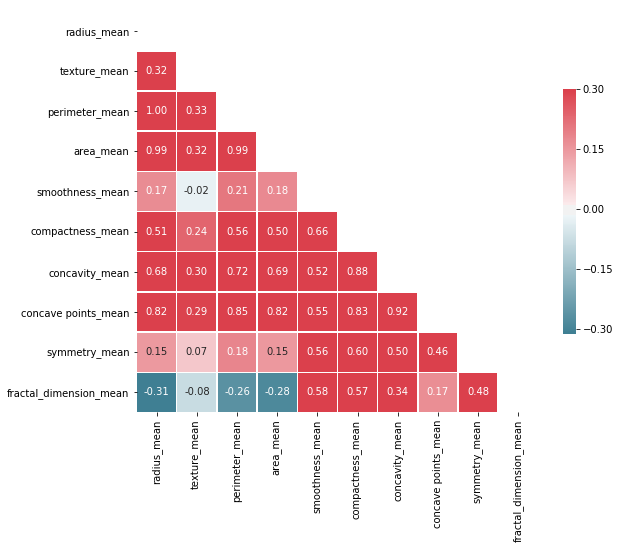

In [34]:
def corrdiag(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    #f, ax = plt.subplots()
    plt.figure(figsize = (9,9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=0.3, center=0,
                fmt=".2f", square=True, linewidths=0.5, cbar_kws={'shrink':.5})
    plt.show()

corrdiag(filtered_data.loc[:,'radius_mean':'fractal_dimension_mean'])
#corrdiag(filtered_data.loc[:,'radius_se':'fractal_dimension_se'])
#corrdiag(filtered_data.loc[:,'radius_worst':'fractal_dimension_worst'])

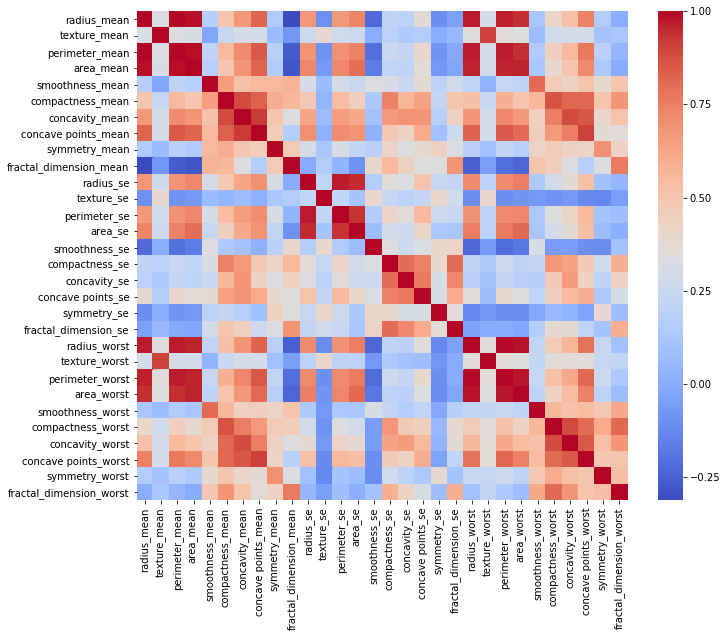

In [35]:
def heatmap(df):
    corr = df.corr()
    plt.figure(figsize = (11,9))
    sns.heatmap(corr, cmap='coolwarm', 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
    plt.show()

heatmap(filtered_data.loc[:,'radius_mean':'fractal_dimension_worst'])

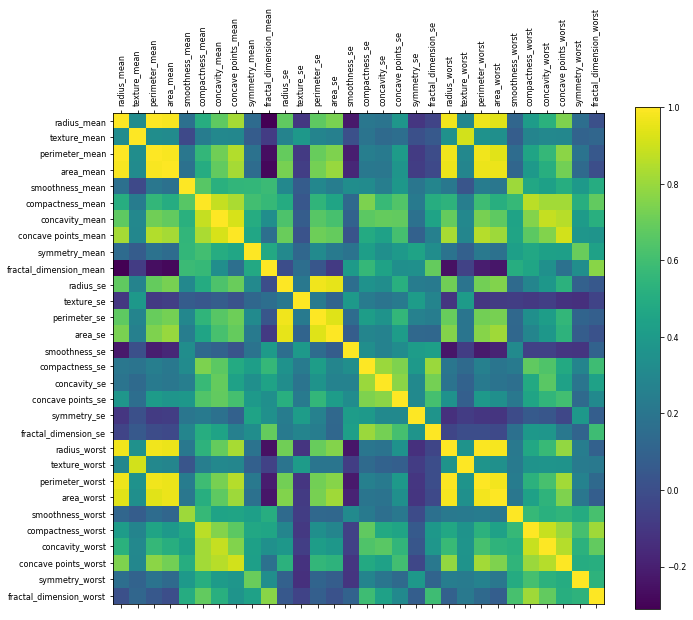

In [52]:
def plotCorrMatrix(df):
    f = plt.figure(figsize=(11,9))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=8)

plotCorrMatrix(filtered_data.loc[:,'radius_mean':'fractal_dimension_worst'])

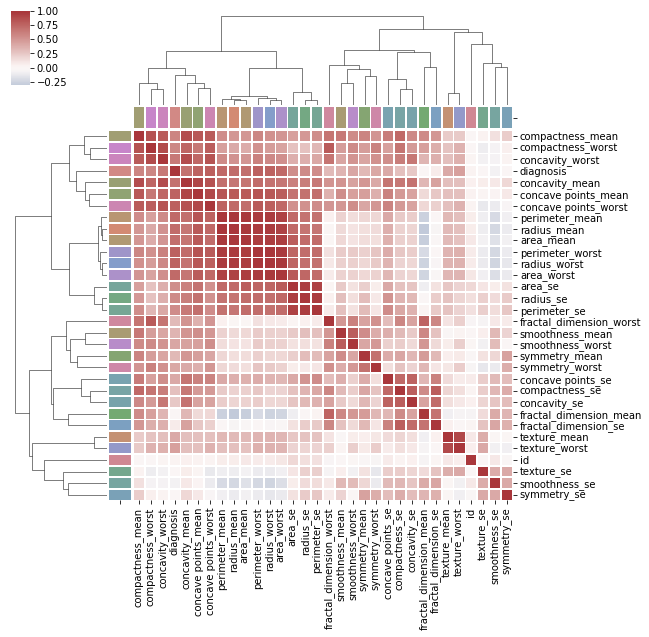

In [36]:
def structured_heatmap(df):
    df_pal = sns.husl_palette(df.shape[1], s=.45)
    df_lut = dict(zip(df.columns, df_pal))
    df_colors = pd.Series(df.columns, index=df.columns).map(df_lut)
    sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=df_colors, col_colors=df_colors,
                   linewidths=.75, figsize=(9, 9))
    plt.show()

structured_heatmap(filtered_data)

In [37]:
def highestcorrpairs(df):
    corr = df.corr().abs()
    sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack().sort_values(ascending=False))
    return sol[sol>0.95]

print(highestcorrpairs(filtered_data.loc[:,'radius_mean':'fractal_dimension_worst']))

radius_mean      perimeter_mean     0.997855
radius_worst     perimeter_worst    0.993708
radius_mean      area_mean          0.987357
perimeter_mean   area_mean          0.986507
radius_worst     area_worst         0.984015
perimeter_worst  area_worst         0.977578
radius_se        perimeter_se       0.972794
perimeter_mean   perimeter_worst    0.970387
radius_mean      radius_worst       0.969539
perimeter_mean   radius_worst       0.969476
radius_mean      perimeter_worst    0.965137
area_mean        radius_worst       0.962746
                 area_worst         0.959213
                 perimeter_worst    0.959120
radius_se        area_se            0.951830
dtype: float64


<font size="5">Are all the thirty features equally important?</font>

In [38]:
filtered_data.drop(filtered_data.columns[[0,1]], axis=1, inplace=True)

Cummulative proportion:  [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


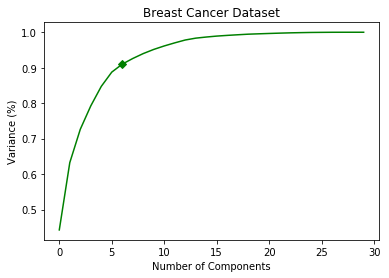

In [39]:
def reducefeatures(df, ncomp):
    X = df.values
    X = scale(X)
    pca = PCA(n_components=ncomp).fit(X)
    cummulative_explained_var = np.cumsum(pca.explained_variance_ratio_)
    print('Cummulative proportion: ', cummulative_explained_var)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '-gD', markevery=[6])
    plt.xlabel('Number of Components')
    plt.ylabel('Variance (%)') #for each component
    plt.title('Breast Cancer Dataset')

reducefeatures(filtered_data, 30)

<font size="5">Let's see the principal components as groups.</font>

In [46]:
def circleOfCorrelations(pc_infos, ebouli):
    plt.axis('scaled')
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.set_size_inches(8,8)
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-0"])):
        x = pc_infos["PC-0"][idx]
        y = pc_infos["PC-1"][idx]
        factor = -2.5
        plt.arrow(0, 0, x*factor, y*factor, width=0.005)
        text = plt.annotate(pc_infos.index[idx], xy=(x*factor,y*factor))
        text.set_fontsize(5)
    plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations")

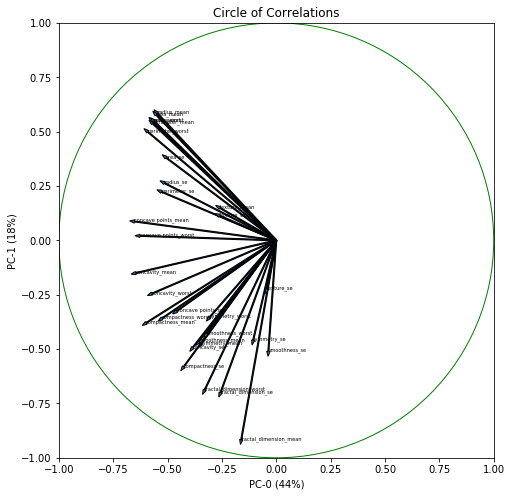

In [47]:
def myPCA(df, clusters=None):
    df_norm = StandardScaler().fit_transform(df)
    pca = PCA(n_components=df.shape[1])
    pca_res = pca.fit_transform(df_norm)
    ebouli = pd.Series(pca.explained_variance_ratio_)
    coef = np.transpose(pca.components_)
    cols = ['PC-'+str(x) for x in range(len(ebouli))]
    pc_infos = pd.DataFrame(coef, columns=cols, index=df.columns)
    circleOfCorrelations(pc_infos, ebouli)

myPCA(filtered_data, clusters=None)